In [1]:
import rhessys.utilities as rut

In [5]:
cal = pd.read_pickle('./data/et_cal17.pcl')

In [6]:
cal.head()

,gs,idx,rd,nse,nse_weekly,pbias,pbias_weekly,pe,pe_weekly,weekly_metric,sd
0,0.0014,0,3.50,-1.7158,-0.8142,0.1738,0.1864,0.9587,0.6699,0.089550,4
1,0.0089,1,0.92,-2.6431,-1.6393,0.1575,0.1622,1.2749,0.9040,-0.324170,4
2,0.0032,2,3.97,-2.1671,-1.1542,0.1537,0.1679,1.0730,0.7432,-0.080816,4
3,0.0017,3,0.89,-1.5000,-0.7303,0.2137,0.2154,0.9804,0.6984,0.131358,4
4,0.0022,4,3.92,-1.9038,-0.9390,0.1601,0.1736,1.0149,0.7035,0.026983,4


In [7]:
cal.loc[cal.weekly_metric==cal.weekly_metric.max()]

,gs,idx,rd,nse,nse_weekly,pbias,pbias_weekly,pe,pe_weekly,weekly_metric,sd
2950,0.0004,2950,2.70,-0.21,0.1242,0.3288,0.3293,0.7072,0.5211,0.559495,4
22566,0.0004,22566,2.71,-0.21,0.1242,0.3288,0.3293,0.7072,0.5211,0.559495,4


In [7]:
def compute_metric_weekly(df):
    pe = df.pe_weekly
    nse = df.nse_weekly
    
    pe = 1.-(pe/100.)
    
    return np.nanmean([nse,pe])

In [8]:
cal['metric_weekly'] = cal.apply(compute_metric_weekly,axis=1)

In [10]:
cal.loc[cal.metric_weekly==cal.metric_weekly.max()]
idx = cal.loc[cal.metric_weekly==cal.metric_weekly.max()].idx.as_matrix()[0]

In [13]:
#vcm = pd.read_pickle('./data/Vcm_cosmos_pillow_swe.pcl')*10.
vcm = pd.read_pickle('./data/VCM.pcl')

In [14]:
vcm.head()

,TA,TA_flag,FC,FC_flag,H,H_flag,LE,LE_flag,RH,RH_flag,VPD,VPD_flag,Rg,Rg_flag,RE,RE_flag,GPP,GPP_flag,ET
2007-01-01,-3.199953,0.020833,-0.317428,0.333333,-9.554262,0.041667,31.864238,0.020833,49.885044,0.020833,0.244799,0.020833,121.539556,0.020833,0.210863,0.333333,0.519806,0.333333,1.097555
2007-01-02,-1.504252,0.000000,0.209414,0.395833,31.413623,0.208333,23.671887,0.000000,41.234000,0.000000,0.333693,0.000000,128.497563,0.000000,0.493970,0.395833,0.284555,0.395833,0.816678
2007-01-03,0.809819,0.000000,0.023366,0.000000,12.583299,0.000000,18.769545,0.000000,31.741896,0.000000,0.442400,0.000000,140.332999,0.000000,0.483780,0.000000,0.460414,0.000000,0.648964
2007-01-04,1.151124,0.000000,-0.028141,0.020833,19.440283,0.000000,11.567320,0.000000,41.413917,0.000000,0.395451,0.000000,143.255668,0.000000,0.471190,0.020833,0.499331,0.020833,0.400073
2007-01-05,-6.204571,0.000000,-0.278247,0.291667,6.318787,0.062500,13.259221,0.041667,80.561604,0.000000,0.082823,0.000000,43.632959,0.000000,0.209208,0.291667,0.487455,0.291667,0.455417


In [11]:
cal.iloc[idx]

gs                 0.000500
gw1                0.318500
gw2                0.795000
idx              107.000000
ksat             146.600000
m                 17.268000
rd                 3.210000
nse                0.105700
nse_weekly         0.353900
pe                 0.738700
pe_weekly          0.480600
r2                -0.767400
r2_weekly         -0.625200
metric_weekly      0.674547
Name: 107, dtype: float64

In [8]:
idx = 22566

In [10]:
dat = rut.readRHESSysBasin('/RHESSys/jemez/out/et_cal17/et_cal17_%s_basin.daily'%idx)

NameError: name 'vcm' is not defined

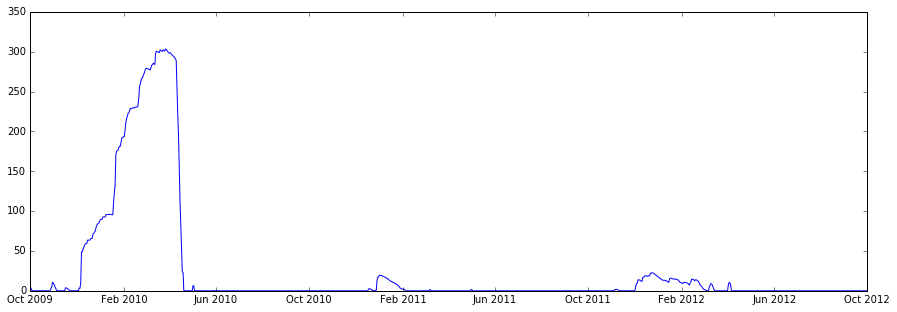

In [11]:
plt.figure(figsize=(15,5))
plt.plot(dat.index,dat.snowpack,label='simulation')
plt.plot(vcm.index,vcm.swe,'-k',label='observation')
plt.xlim(dat.index.min(),dat.index.max())
plt.title('snowcal_04_1214 NSE:0.652, pmult:1.0', fontsize=16)
plt.ylabel('SWE [mm]', fontsize=16)
plt.savefig('./figures/snowcal_04_1214.png')

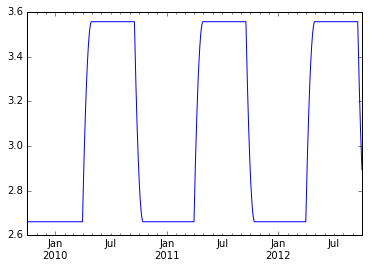

In [12]:
dat.lai.plot()

In [13]:
dat.lai.head()

2009-10-01    2.660257
2009-10-02    2.660257
2009-10-03    2.660257
2009-10-04    2.660257
2009-10-05    2.660257
Name: lai, dtype: float64